Some imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Find closest centroid for every example.

In [10]:
def find_closest_centroids(X, centroids):
    """
    Args:
        X: (m, n) Input values      
        centroids: (K, n) centroids
    Returns:
        idx: (m,) closest centroids
    """
    
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        current_x = X[i]  
        min_L2 = float('inf')  
        for k in range(K):
            L2 = np.sum((current_x - centroids[k]) ** 2)
            if L2 < min_L2:
                min_L2 = L2
                idx[i] = k  
    return idx

In [11]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for k in range(K):
        points = X[idx==k]
        centroids[k] = np.mean(points, axis = 0)
        
    return centroids

In [12]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    for i in range(max_iters):
        
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        idx = find_closest_centroids(X, centroids)
        
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [13]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    
    centroids = X[randidx[:K]]
    
    return centroids

Load image and visualize (put it in data dir)

In [14]:
original_img = plt.imread('data/picture.png')

FileNotFoundError: [Errno 2] No such file or directory: 'data/picture.png'

In [7]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

ValueError: cannot reshape array of size 1411200 into shape (352800,3)

You can change K,max_it variables 

In [20]:
K = 8
max_it = 5

init_centroids = kMeans_init_centroids(X_img, K)

centroids, idx = run_kMeans(X_img, init_centroids, max_it)

NameError: name 'X_img' is not defined

Changing Image

In [19]:
idx = find_closest_centroids(X_img, centroids)

X_recovered = centroids[idx, :] 

X_recovered = np.reshape(X_recovered, original_img.shape) 

NameError: name 'X_img' is not defined

Display results

NameError: name 'X_recovered' is not defined

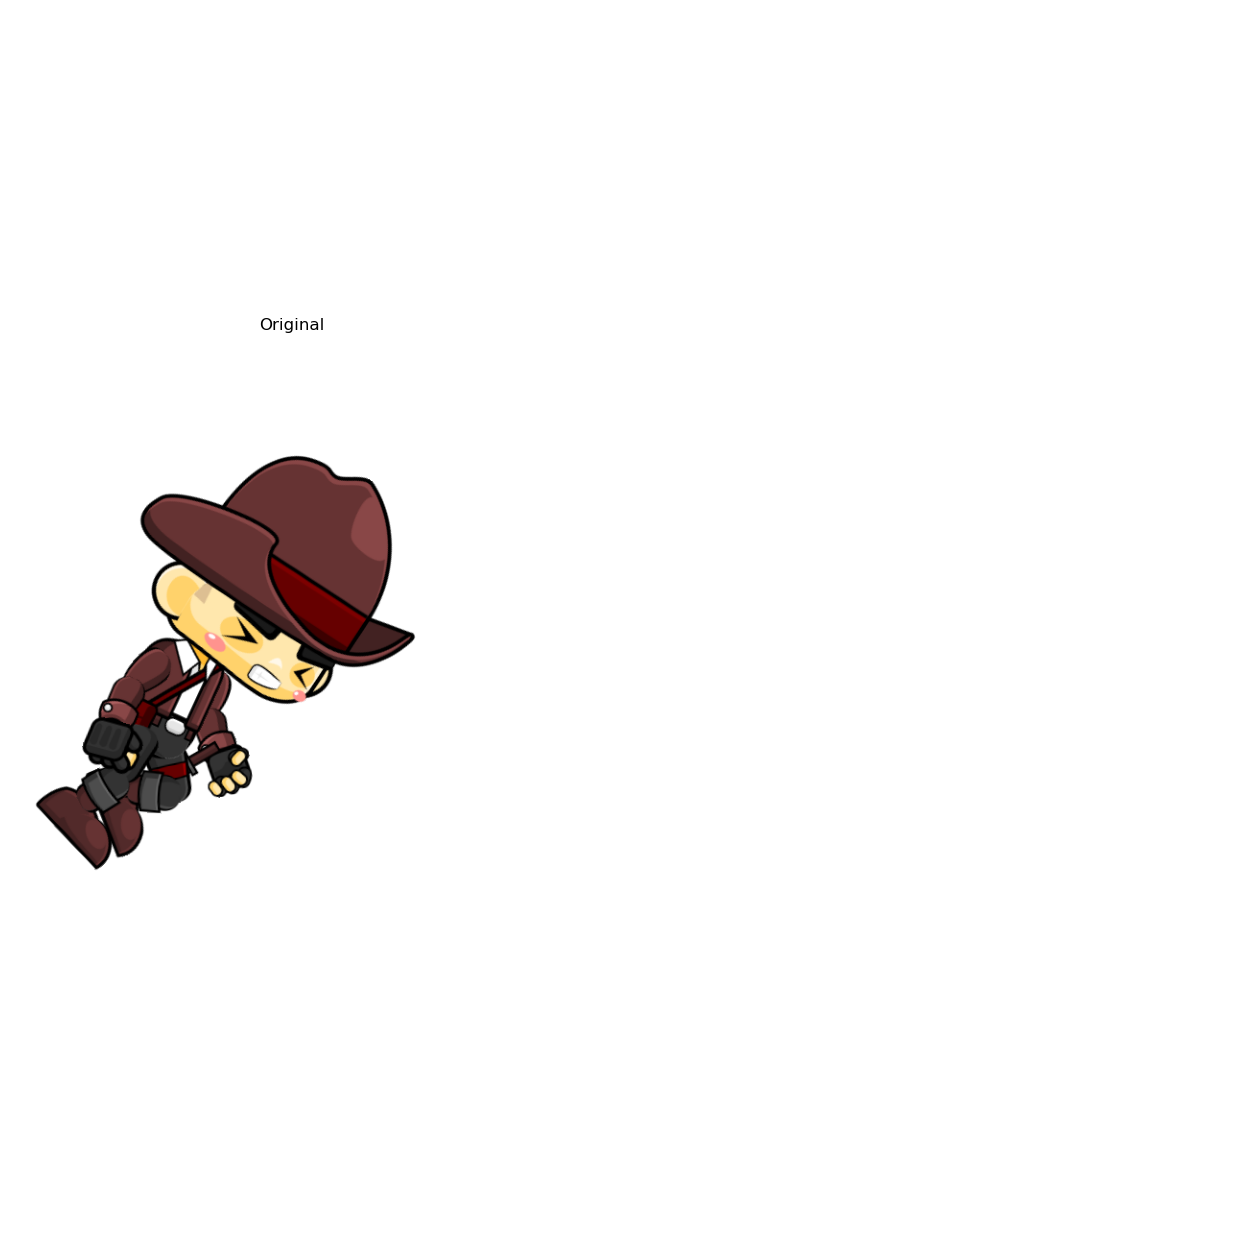

In [8]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered)
ax[1].set_title('Compressed')
ax[1].set_axis_off()